In [1]:
import numpy as np
import math
import scipy.interpolate
from matplotlib import pyplot
import matplotlib
import seaborn as sns

In [5]:
k=1; mass=1; alpha=10; lamda = 10
nn=20; nstep=2**nn; tstep=0.00001
velocity,position=[],[]
pos=1; vel=0; force=0
t = np.arange(0,nstep*tstep, tstep)

# start loop...
for i in range(nstep):
    # step 1 of leapfrog...
    vel+=tstep/2.*force/mass
    pos+=vel*tstep
    force=-k*pos  -pos**3*alpha -pos**2*lamda
    # step 2 of leapfrog...
    vel+=tstep/2.*force/mass
    
    # store the state for later processing...
    velocity.append(vel)
    position.append(pos)

# now fourier transform...
spectra=np.fft.fft(velocity)
omega=np.fft.fftfreq(nstep,d=tstep)*2*np.pi

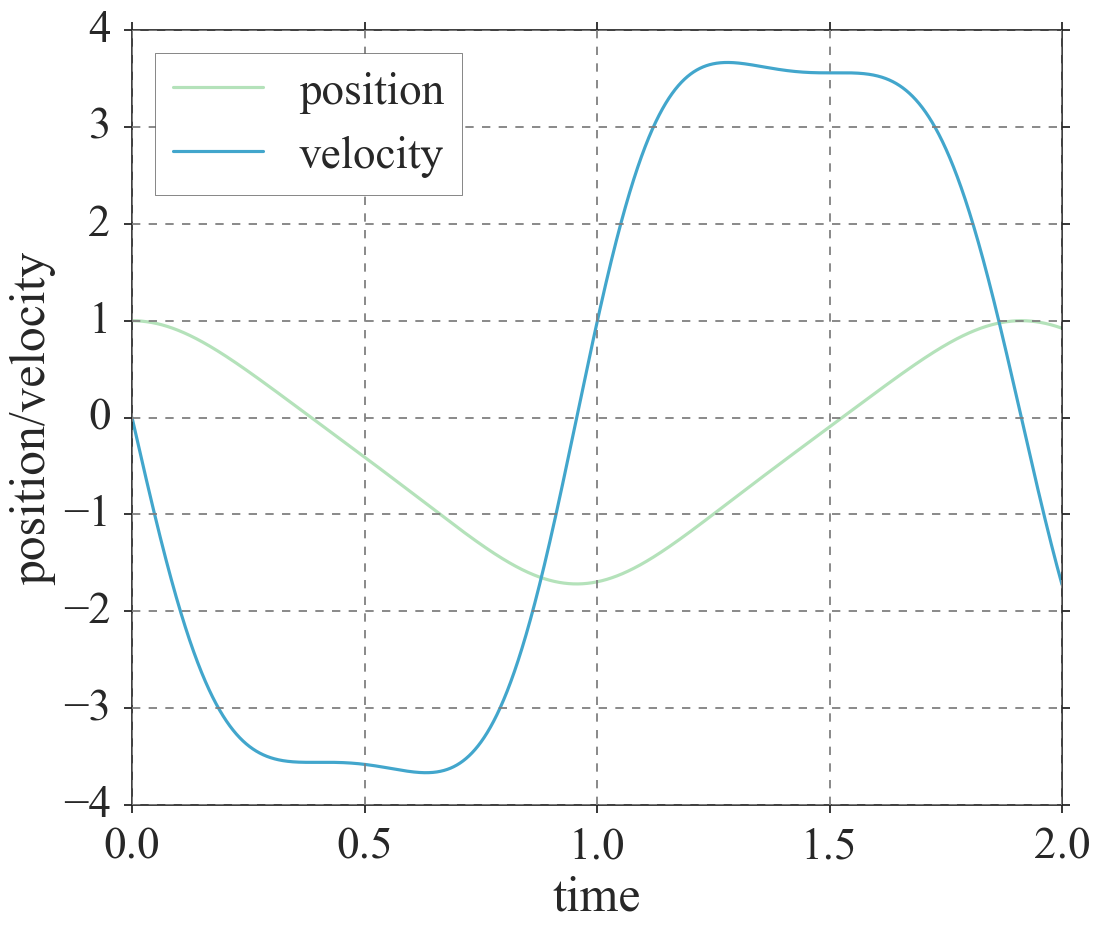

In [6]:
%matplotlib inline

sns.set_style("ticks", {'font.family': 'Times New Roman','axes.axisbelow': False,'grid.linestyle': u'--', 'grid.color': '.5', 'legend.frameon': True})

sns.set_palette(sns.color_palette('GnBu', n_colors=2))

x_start, x_end = 0,2
y_start, y_end = -4,4

pyplot.figure(1)
sns.set_context("talk", font_scale=2.5)
pyplot.figure(figsize=(12, 10))
pyplot.grid(True)
pyplot.ylabel('position/velocity')
pyplot.xlabel('time')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(t, position, linestyle='solid')
pyplot.plot(t, velocity, linestyle='solid')
pyplot.legend(['position', 'velocity'], loc='best');
pyplot.savefig('2c.pdf', dpi=300, bbox_inches='tight');

In [7]:
print(np.mean(position))

-0.338338897803
